# Import Library

In [1]:
import re
import nltk
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import gensim
from gensim.corpora import Dictionary
from gensim.test.utils import get_tmpfile
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 100

# Input Data

In [2]:
data = pd.read_excel('https://raw.githubusercontent.com/phik753/dataset/master/dataset/merge_11_cabang.xlsx')
data = pd.DataFrame(data)
data[['snippet']]

,snippet
0,Ok
1,Nice 🤗
2,very friendly service
3,Very good♥️
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,..."
...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget"
1044,NaN
1045,NaN
1046,NaN


# menghapus NaN atau null


In [ ]:
# print(data['snippet'].head())  # Untuk melihat sampel data
print(data['snippet'].isnull().sum())  # Hitung jumlah nilai NaN

286


In [4]:
data['snippet'] = data['snippet'].fillna('')  # Ganti NaN dengan string kosong

# Preprocesing

In [5]:
print(data['snippet'].isnull().sum())  # Hitung jumlah nilai NaN

0


In [6]:
def filteringText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text) 
    text = re.sub(r'[0-9]+', '', text) 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text

def casefoldingText(text): 
    text = text.lower() 
    return text

def tokenizingText(text): 
    text = word_tokenize(text) 
    return text
    
slangWord = pd.read_excel('https://raw.githubusercontent.com/phik753/dataset/master/Automated-labelling-Inset-Lexicon/kamus_kata_alay.xlsx')

slangWord_dict = {}

for index, row in slangWord.iterrows():
    if row[0] not in slangWord_dict:
        slangWord_dict[row[0]] = row[1]
        
def slangWordText(text):
    text = [slangWord_dict[term] if term in slangWord_dict else term for term in text]
    return text

def stopwordRemovalText(text): 
    factory = StopWordRemoverFactory()
    stopword = factory.get_stop_words()
    kata = ['sih', 'ya', 'hahaha', 'terus', 'tt', 'jadi', 'lah', 'gue', 'dulu', 'kok', 'an', 'nya', 'e','kan','lo','per', 'ba', 'lu', 'gp', 'si', 'bor', 'ah', 'tak']
    stopword.extend(kata)
    text = [word for word in text if word not in stopword]
    return text



## Case Folding

In [7]:
#Case Folding
data['preprocessing'] = data['snippet'].apply(casefoldingText)
data[['snippet', 'preprocessing']]


,snippet,preprocessing
0,Ok,ok
1,Nice 🤗,nice 🤗
2,very friendly service,very friendly service
3,Very good♥️,very good♥️
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,...","harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,..."
...,...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget","tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget"
1044,,
1045,,
1046,,


## Filtering

In [8]:
#Filtering
data['preprocessing'] = data['preprocessing'].apply(filteringText)
data[['snippet', 'preprocessing']]

,snippet,preprocessing
0,Ok,ok
1,Nice 🤗,nice 🤗
2,very friendly service,very friendly service
3,Very good♥️,very good♥️
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,...",harga lmyan terjangkau tempatnya bersih ada playground untuk anak pelayanan ramah n sat set temp...
...,...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget",tempatnya nyaman bersih luas makanannya juga enak rekomended banget
1044,,
1045,,
1046,,


## Tokenisasi

In [9]:
#Tokenisasi
data['preprocessing'] = data['preprocessing'].apply(tokenizingText)
data[['snippet', 'preprocessing']]

,snippet,preprocessing
0,Ok,[ok]
1,Nice 🤗,"[nice, 🤗]"
2,very friendly service,"[very, friendly, service]"
3,Very good♥️,"[very, good♥️]"
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,...","[harga, lmyan, terjangkau, tempatnya, bersih, ada, playground, untuk, anak, pelayanan, ramah, n,..."
...,...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget","[tempatnya, nyaman, bersih, luas, makanannya, juga, enak, rekomended, banget]"
1044,,[]
1045,,[]
1046,,[]


## Normalisasi

In [10]:
#Normalisasi
data['preprocessing'] = data['preprocessing'].apply(slangWordText)
data[['snippet', 'preprocessing']]

,snippet,preprocessing
0,Ok,[ok]
1,Nice 🤗,"[nice, 🤗]"
2,very friendly service,"[very, friendly, service]"
3,Very good♥️,"[very, good♥️]"
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,...","[harga, lmyan, terjangkau, tempatnya, bersih, ada, playground, untuk, anak, pelayanan, ramah, n,..."
...,...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget","[tempatnya, nyaman, bersih, luas, makanannya, juga, enak, rekomended, banget]"
1044,,[]
1045,,[]
1046,,[]


## Stopword Removal

In [11]:
#Stopword Removal
data['preprocessing'] = data['preprocessing'].apply(stopwordRemovalText)
data[['snippet', 'preprocessing']]

,snippet,preprocessing
0,Ok,[]
1,Nice 🤗,"[nice, 🤗]"
2,very friendly service,"[very, friendly, service]"
3,Very good♥️,"[very, good♥️]"
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,...","[harga, lmyan, terjangkau, tempatnya, bersih, playground, anak, pelayanan, ramah, n, sat, set, t..."
...,...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget","[tempatnya, nyaman, bersih, luas, makanannya, enak, rekomended, banget]"
1044,,[]
1045,,[]
1046,,[]


# Ekstraksi Aspek Menggunakan Latent Dirichlet Allocation (LDA)

In [12]:
doc_clean = data['preprocessing']

dictionary = Dictionary(doc_clean)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean] 

In [13]:
coherence = []
for k in range(1,11):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary,  passes=50, iterations=100, chunksize=1519, eval_every=None)
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=doc_clean,
                                                     dictionary=dictionary, coherence='c_v')

    coherence.append((k,cm.get_coherence()))

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10


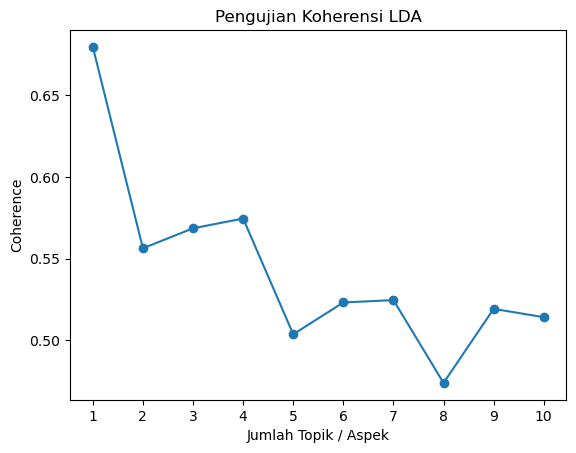

In [14]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Pengujian Koherensi LDA')
plt.xlabel('Jumlah Topik / Aspek')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [15]:
print(coherence)

[(1, 0.6794613375366281), (2, 0.5563082702270414), (3, 0.5685014566638628), (4, 0.5744990711384009), (5, 0.503678557827665), (6, 0.5231482984966896), (7, 0.5245935056902196), (8, 0.47393389295912935), (9, 0.5192402999715756), (10, 0.5141428110243421)]


In [16]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 2 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

# Running and Trainign LDA model on the document term matrix.
lda_model = Lda(doc_term_matrix, 
            num_topics=total_topics, 
            id2word = dictionary, 
            chunksize=1519,
            passes=50,
            iterations=100,
            eval_every=None,
            random_state=None)
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
#df_imp_wcount

#Dominant topic and its percentage contribution in each topic
document = data['preprocessing']

# def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=document):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[corpus]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list            
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 # sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#                 # sent_topics_df = pd.concat(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#                 sent_topics_df = pd.concat([sent_topics_df, pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords], index=sent_topics_df.columns).to_list()], ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)

def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=document):
    # Initialize output dataframe with predefined column names
    sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution, and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                
                # Corrected: Use a list instead of a single Series and reset the index
                new_row = pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords], index=sent_topics_df.columns)
                sent_topics_df = pd.concat([sent_topics_df, new_row.to_frame().T], ignore_index=True)  # Convert Series to DataFrame and transpose
                
            else:
                break

    # Add the original text to the DataFrame
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']

    return sent_topics_df

    
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)


# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

pyLDAvis.enable_notebook()
topic_data =  gensimvis.prepare(lda_model, doc_term_matrix, dictionary, mds = 'pcoa')

    
dataLDA = data['aspek'] = df_dominant_topic['Dominant_Topic']

data_LDA = data

In [17]:
all_topics = {}
lambd = 0.6# Adjust this accordingly
for i in range(1,total_topics+1): #Adjust number of topics in final model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)]
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:10].values
    
pd.DataFrame(all_topics)

,Topic 1,Topic 2
0,tempatnya,ayam
1,nyaman,geprek
2,enak,enggak
3,bersih,mantap
4,ramah,kurang
5,banget,kalau
6,tempat,good
7,pelayanan,nasi
8,harga,lebih
9,buat,teh


In [18]:
data['aspek'] = data['aspek'].map({ 0 :'tempat', 
                             1 : 'ramah'},
                            na_action=None)

data[['snippet', 'preprocessing', 'aspek']]

,snippet,preprocessing,aspek
0,Ok,[],tempat
1,Nice 🤗,"[nice, 🤗]",tempat
2,very friendly service,"[very, friendly, service]",ramah
3,Very good♥️,"[very, good♥️]",ramah
4,"Harga lmyan terjangkau, tempatnya bersih ada playground untuk anak2, pelayanan ramah n sat set,,...","[harga, lmyan, terjangkau, tempatnya, bersih, playground, anak, pelayanan, ramah, n, sat, set, t...",tempat
...,...,...,...
1043,"Tempatnya nyaman, bersih, luas, makanannya juga enak rekomended banget","[tempatnya, nyaman, bersih, luas, makanannya, enak, rekomended, banget]",tempat
1044,,[],tempat
1045,,[],tempat
1046,,[],tempat


aspek
tempat    843
ramah     205
Name: count, dtype: int64


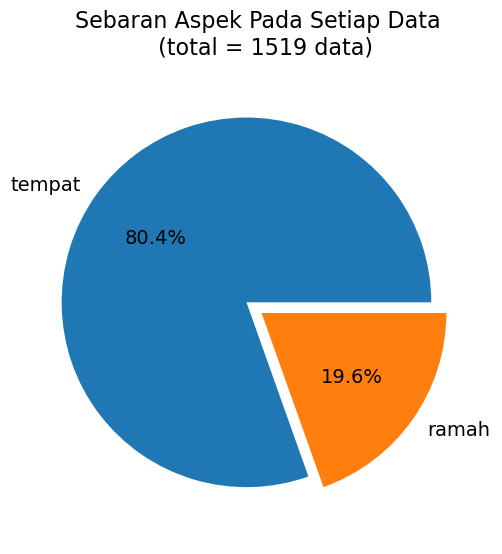

In [19]:
#pd.DataFrame(all_topics)
print(data['aspek'].value_counts())
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['aspek'].value_counts()]
labels = list(data['aspek'].value_counts().index)
explode = (0.1, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sebaran Aspek Pada Setiap Data \n (total = 1519 data)', fontsize = 16, pad = 20)
plt.show() 

# Pelabelan Otomatis Menggunakan Inset Lexicon

In [ ]:
lexicon_positive = pd.read_excel('https://raw.githubusercontent.com/phik753/dataset/master/Automated-labelling-Inset-Lexicon/kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('https://raw.githubusercontent.com/phik753/dataset/master/Automated-labelling-Inset-Lexicon/kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positif'
    elif (score < 0):
        sentimen = 'negatif'
    else:
        sentimen = 'netral'
    return score, sentimen
    
results = data['preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['score_sentimen'] = results[0]
#data['sentimen'] = results[1]
#data

data['score_sentimen'] = results[1]
dataSentimen = data.rename(columns = { 'score_sentimen': 'sentimen_inset' }, inplace=True)
data_inset = data

data_inset[['snippet', 'preprocessing', 'aspek', 'sentimen_inset']]

# Pengujian Akurasi

In [ ]:
data_uji = pd.read_excel('../Skripsi/data_uji.xlsx')
data_uji = pd.DataFrame(data_uji)
display(data_uji)

In [ ]:
data['aspek_sentimen'] = data['aspek'] + " " + data['sentimen']
data['aspek_sentimen_inset'] = data['aspek'] + " " + data['sentimen_inset']

aspek_covid   = data[data['aspek'] == 'covid']
aspek_omicron = data[data['aspek'] == 'omicron']

In [ ]:
print('Pengujian Akurasi Pelabelan Aspek')
print(classification_report(data['aspek'], data['aspek_manual']))

print('nilai akurasinya adalah ',accuracy_score(data['aspek'], data['aspek_manual']))

print(confusion_matrix(data['aspek'], data['aspek_manual']))

In [ ]:
print('Pengujian Akurasi Sentimen Aspek Covid')
print(classification_report(aspek_covid['aspek_sentimen_inset'], aspek_covid['aspek_sentimen']))

print('nilai akurasinya adalah ',accuracy_score(aspek_covid['aspek_sentimen_inset'], aspek_covid['aspek_sentimen']))

print(confusion_matrix(aspek_covid['aspek_sentimen_inset'], aspek_covid['aspek_sentimen']))

In [ ]:
print('Pengujian Akurasi Sentimen  Aspek Omicron')
print(classification_report(aspek_omicron['aspek_sentimen_inset'], aspek_omicron['aspek_sentimen']))

print('nilai akurasinya adalah ',accuracy_score(aspek_omicron['aspek_sentimen_inset'], aspek_omicron['aspek_sentimen']))

print(confusion_matrix(aspek_omicron['aspek_sentimen_inset'], aspek_omicron['aspek_sentimen']))